In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coalitions = pd.read_csv('cluster_final.csv')

In [3]:
coalitions.head()

,Unnamed: 0,Актор,Возможности для получения высшего образования,Грамотность населения,Дихотомия “личность - государство”,Дихотомия “личность - коллектив” (приоритетность развития),Западная риторика,Идеологическая ориентация аргументов,Качество образования,Критика власти,...,Распределение полномочий между федеральными и региональными органами власти,Способ принятия решений - представительство/самостоя тельное решение уполномоченными органами,"Ценности, связанные с материальным благосостоянием граждан","Ценности, связанные с уровнем развития общества",Экономическое международное сотрудничество,clusters_city,ind,clusters_kmedoids5,clusters_kmedoids4,clusters_kmedoids6
0,0,Аксаков А. Г.,1,1,1,1,-1,1,1,1,...,1,1,1,1,1,0,20,0,0,0
1,1,Алимова О. Н.,-1,1,-1,1,-1,-1,-1,-1,...,-1,-1,1,1,-1,1,-8,3,3,3
2,2,Андрейченко А. В.,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,1,1,-14,2,3,2
3,3,Арефьев Н. В.,-1,-1,1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,1,1,-10,3,2,3
4,4,Аршинова А. И.,1,1,-1,1,-1,-1,1,1,...,-1,-1,1,-1,1,2,0,2,1,5


In [4]:
blocks = {
    'Образовательное размежевание': [
        'Возможности для получения высшего образования',
        'Качество образования',
        'Грамотность населения',
        'Наука - главный приоритет'
    ],
    'Политическое размежевание': [
        'Дихотомия “личность - государство”',
        'Идеологическая ориентация аргументов',
        'Западная риторика',
        'Критика власти'
    ],
    'Аксиологическое размежевание': [
        'Экономическое международное сотрудничество',
        'Политическое сотрудничество с разными странами',
        'Ценности, связанные с материальным благосостоянием граждан',
        'Ценности, связанные с уровнем развития общества',
        'Место исторического нарратива',
        'Наиболее общие ценностные приоритеты',
        'Отношение к культуре и идентичности',
        'Позиция по изменениям, реформам по направлениям политики'
    ]
}

In [7]:
def create_difference_matrix(df, columns):
    n = len(df)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i, j] = np.sum(np.abs(df.loc[i, columns] - df.loc[j, columns]))
    return matrix


difference_matrices = {}
for block_name, columns in blocks.items():
    difference_matrices[block_name] = create_difference_matrix(coalitions, columns)


for block_name, matrix in difference_matrices.items():
    matrix_df = pd.DataFrame(matrix, index=coalitions['Актор'], columns=coalitions['Актор'])
    matrix_df.to_csv(f"{block_name}_difference_matrix.csv", encoding='utf-8-sig')
    print(f"{block_name} матрица сохранена в файл {block_name}_difference_matrix.csv")

Образовательное размежевание матрица сохранена в файл Образовательное размежевание_difference_matrix.csv
Политическое размежевание матрица сохранена в файл Политическое размежевание_difference_matrix.csv
Аксиологическое размежевание матрица сохранена в файл Аксиологическое размежевание_difference_matrix.csv


In [9]:
df = pd.read_csv('model_data_with_divisions.csv')
df

,Betas,P.values,tstat,index,Names,SEs
0,-4.196292,0.00,-21.635158,16,Константа (edges/density),0
1,-0.492954,0.13,-5.081397,15,Общий пол,0
2,-0.000817,0.93,-0.157239,14,Разница в возрасте,0
3,-1.148442,0.05,-3.854723,13,Общее образование,0
4,-0.068641,0.80,-0.553278,12,Общая специальность,0
5,-0.010283,0.99,-0.038533,11,Общий регион,0
6,2.670902,0.00,21.221233,10,Фракция Единая Россия,0
7,2.566422,0.00,15.009438,9,Фракция КПРФ,0
8,1.191797,0.06,3.448997,8,Фракция ЛДПР,0
9,7.499514,0.00,27.224520,7,Фракция СР,0


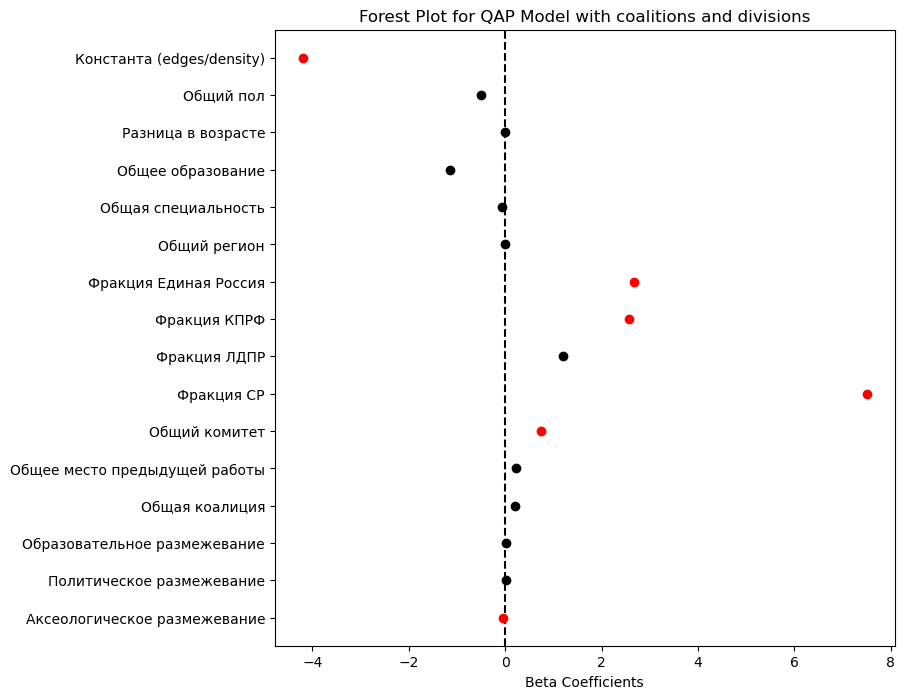

In [13]:
df = df.iloc[::-1].reset_index(drop=True)  
betas = df['Betas']
conf_int_low = betas - 1.96 * df['SEs']
conf_int_high = betas + 1.96 * df['SEs']
names = df['Names']
p_values = df['P.values']  


significant = p_values < 0.05
non_significant = ~significant

fig, ax = plt.subplots(figsize=(8, len(df) * 0.5))


ax.errorbar(betas[significant], df.index[significant], xerr=[betas[significant] - conf_int_low[significant], conf_int_high[significant] - betas[significant]], fmt='o', color='red', ecolor='red', capsize=3)


ax.errorbar(betas[non_significant], df.index[non_significant], xerr=[betas[non_significant] - conf_int_low[non_significant], conf_int_high[non_significant] - betas[non_significant]], fmt='o', color='black', ecolor='gray', capsize=3)

ax.axvline(x=0, color='black', linestyle='--')

ax.set_yticks(range(len(df)))
ax.set_yticklabels(names)
ax.set_xlabel('Beta Coefficients')
ax.set_title('Forest Plot for QAP Model with coalitions and divisions')

plt.show()

In [11]:
df_4 = pd.read_csv('model_data_new_without_coalition.csv')
df_4

,Betas,P.values,tstat,index,Names,SEs
0,-4.059825,0.00,-22.624676,15,Константа (edges/density),0
1,-0.491500,0.19,-5.070276,14,Общий пол,0
2,-0.001224,0.95,-0.235705,13,Разница в возрасте,0
3,-1.148551,0.05,-3.849560,12,Общее образование,0
4,-0.064961,0.82,-0.523826,11,Общая специальность,0
5,-0.026457,0.94,-0.099229,10,Общий регион,0
6,2.680862,0.00,21.262641,9,Фракция Единая Россия,0
7,2.558582,0.00,14.970226,8,Фракция КПРФ,0
8,1.205342,0.11,3.489878,7,Фракция ЛДПР,0
9,7.508119,0.00,27.268685,6,Фракция СР,0


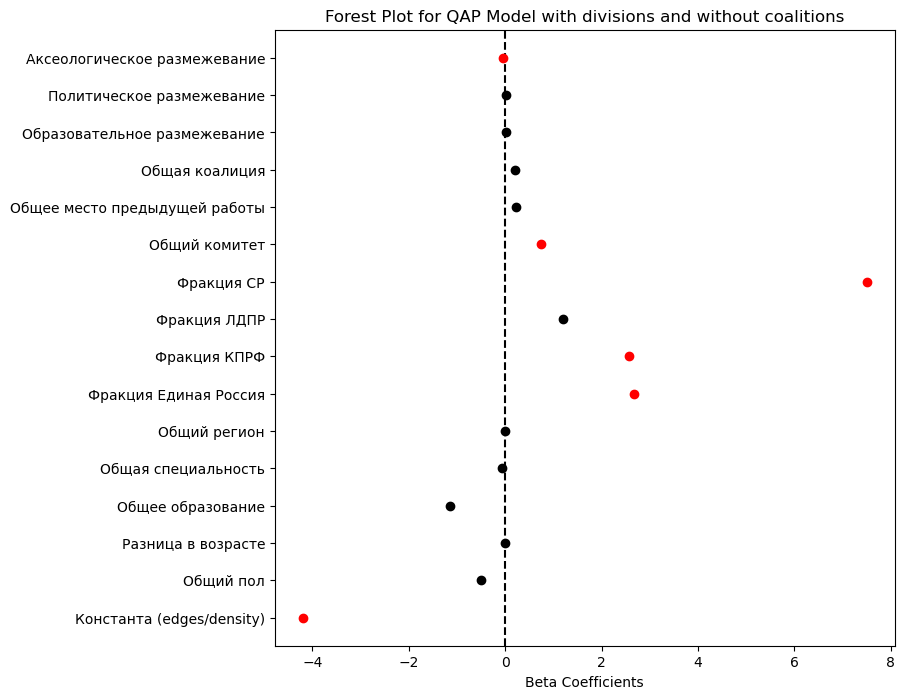

In [18]:
df_4 = df.iloc[::-1].reset_index(drop=True)

betas = df_4['Betas']
conf_int_low = betas - 1.96 * df_4['SEs']
conf_int_high = betas + 1.96 * df_4['SEs']
names = df_4['Names']
p_values = df_4['P.values']

significant = p_values < 0.05
non_significant = ~significant

fig, ax = plt.subplots(figsize=(8, len(df_4) * 0.5))


ax.errorbar(betas[significant], np.where(significant)[0], xerr=[betas[significant] - conf_int_low[significant], conf_int_high[significant] - betas[significant]], fmt='o', color='red', ecolor='red', capsize=3)
ax.errorbar(betas[non_significant], np.where(non_significant)[0], xerr=[betas[non_significant] - conf_int_low[non_significant], conf_int_high[non_significant] - betas[non_significant]], fmt='o', color='black', ecolor='gray', capsize=3)

ax.axvline(x=0, color='black', linestyle='--')

ax.set_yticks(range(len(df_4)))
ax.set_yticklabels(names)
ax.set_xlabel('Beta Coefficients')
ax.set_title('Forest Plot for QAP Model with divisions and without coalitions')

plt.show()
